<a href="https://colab.research.google.com/github/marianqian/Intro-to-ML-and-DL-Using-fast.ai/blob/master/notebooks/Lesson_4_Processing_Data_Using_fast_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to the AI Academy! This is the fourth lesson, focused on learning how to use the fast.ai library to process in data from different sources. [fastai](https://www.fast.ai/) is an extremely easy to use library with several deep learning capabilities and is built on top of PyTorch, which we used in the previous Google Colab notebook. 

You can learn more about fastai [here](https://docs.fast.ai/); the library is split between four different parts, which are vision, text, tabular, and collab models. fastai focuses on neural networks, and for the rest of the course we will be exploring how to use this library. 

The creater of fastai, Jeremy Howard, also taught a course explaining how to use the library and introduces deep learning to those who have no experience with it before. We highly recommend you to look at his videos linked [here](https://course.fast.ai/videos/?lesson=1) when you have the time. 

NOTE: Educational use and distribution is permitted, but credit and attribution to AIM Academy is required. 


#Learning Objectives

* Learn about what is fastai
* Understand how to process and load in data
* Understand what datablocks and databunches are
* Understand how to read in data in different ways




The data that is used for training neural networks is often collected from the real world. The fastai library contains datasets separated into labelled training and testing data for you, so all you need to do is call load them into your code, and this notebook will show you how. 



The [**data block API**](https://docs.fast.ai/data_block.html) is structured to handle organizing the data to pass into the neural network found only in fastai. A **[`Databunch`](https://docs.fast.ai/basic_data.html#DataBunch)** is what is passed directly into the neural network itself, and it contains the training and testing sets. The training and testing sets are [`Dataloaders`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) (data structures in PyTorch). Sometimes data augmentation is applied, which is essentially changing the existing data slightly in order to generate more data for the model to train on. 

#Tabular data
**We will be reading in information about people in order to predict their whether their salaries are greater or less than $50,000.**
When we train a neural network to solve a problem, there are can be many ways for the data, or traning examples, to be formatted in. Sometimes they are in individual folders, sometimes the data is located in a spreadsheet, and other times the data requires us to modify the labels in order for our neural network to work. 

In this notebook, we will introduce the different ways and structures we can read in data. First, we will import the tabular section of fastai by calling `fastai.tabular`. [Tabular](https://www.merriam-webster.com/dictionary/tabular) data is data which is arranged in a table, "set up in rows and columns". It is usually the most common type of data which you will come across on; for example, using prices of houses to determine the sizes of the houses is tabular data. Tabular data can be numbers, or words which represent categories.

In [0]:
from fastai.tabular import *

##Reading in data
The `path` variable contains the file path to where the data is stored, which is outputted as `/root/.fastai/data/adult_sample`. Notice that different types of datasets are located at different URL names (some include URLs. PLANET_TINY and URLs.MNIST_TINY, which are images instead of tabular data). 


In [0]:
#CODE BELOW IS FULLY CREDITED TO FASTAI (fast.ai)
#USED ONLY FOR EDUCATIONAL PURPOSES UNDER FAIR USE

path = untar_data(URLs.ADULT_SAMPLE)
print(path)


/root/.fastai/data/adult_sample


module

In the second line, we call the **pandas** library, which is another Python library for handling data. We did not have to call `import pandas` because the pandas library was already imported when we called `from fastai.tabular import *`. As you can see, fastai contains many capabilities! 

The method `read_csv` was called from the pandas library, which was shortened to `pd`. The parameter that was passed inside the method was `path/'adult.csv'`, which located the file `adult.csv` inside the file path that led to a folder from the `path` variable. `read_csv` read the contents inside the CSV file and now we can access what was inside the data through a **dataframe**. 

Dataframes are structures that are defined in the pandas library and are very similar to numpy arrays but is a table of values instead. 

Note that CSV file means a comma comma separated file, which is essentially a condensed version of an Excel or Google spreadsheet. 

In [0]:
#CODE BELOW IS FULLY CREDITED TO FASTAI (fast.ai)
#USED ONLY FOR EDUCATIONAL PURPOSES UNDER FAIR USE

df = pd.read_csv(path/'adult.csv')

In the next code-block, the names of the data are defined, including the names for dependent and independent variables, which are further sorted into categorical, and continuous variables. 

Categorical variables often have text defining what they are. For instance, color is a categorical variable, so the data in that category would be `blue`, `red`, and `green`. These will be replaced by numbers for the neural network, meaning that `1` will replace `blue`, `2` will replace `red`, and `3` will replace `green`. 

These names will be used to identify what a piece of data means inside the file we are trying to read with `read_csv`. 

In [0]:
#CODE BELOW IS FULLY CREDITED TO FASTAI (fast.ai)
#USED ONLY FOR EDUCATIONAL PURPOSES UNDER FAIR USE

dep_var = 'salary'                                          #dependent variable - what we are trying to predict

cat_names = ['workclass', 'education', 'marital-status',    #independent categorical variables -  x-variables which are separated into categories
            'occupation', 'relationship', 'race']

cont_names = ['age', 'fnlwgt', 'education-num']             #independent continuous variables - x-variables which do not have specific categories

procs = [FillMissing, Categorify, Normalize]                '''pre-processers - we need to change the data so that nothing is missing 
                                                            (fill in missing data values, 
                                                            change the categorical variables into numbers so that the neural network 
                                                            can do calculat with them, 
                                                            and normalize the data so there are not very small or large values in the data)'''

Here, we are calling several different methods in order to turn the information from the `df` pandas dataframe into information we can pass directly into a fastai neural network. 

`TabularList` is a class imported from `fastai.tabular` and is a subclass of `ItemList`, which contains data and their labels. 

The data comes from a dataframe, which is why we call `from_df` and pass in the independent categorical and continuous variables. 

After creating a `TabularList`, we want to split the data into training and testing sets, which is done by calling `split_by_idx`. 

We then add labels by calling `label_from_df`, which looks at the column called 'salary' in the dataframe that was passed in the `from_df` method. The labels are the salaries of the people. 

Finally, after loading the data from the pandas dataframe into a `ItemList`, splitting the data for training and testing sets, and adding labels to the data, we can create a `Databunch` called `data`! We will then pass data into a neural network. 



In [0]:
#CODE BELOW IS FULLY CREDITED TO FASTAI (fast.ai)
#USED ONLY FOR EDUCATIONAL PURPOSES UNDER FAIR USE

data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                            #Where are the images? in the df object, which contains data from 'adult.csv'
                           .split_by_idx(list(range(800,1000)))
                            #How to split training and testing sets? split them by index, with the first 200 examples to be in the testing set
                           .label_from_df(cols=dep_var)
                            #How to find the labels? the labels are located in the column called 'salary', which is dep_var
                           .databunch())
                            #Finally convert it to a Databunch

Here we call the method `show_batch` on the `data` DataBunch object to show the x and y variables. You can see the different features in the first row, and the final label is called `target`, which is the label we are trying to predict.

In [0]:
data.show_batch(rows=10)

workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,target
Federal-gov,Doctorate,Married-civ-spouse,#na#,Husband,White,True,0.6166,-0.8244,-0.0312,>=50k
Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,False,1.4962,0.5448,-0.4224,<50k
Local-gov,Masters,Married-civ-spouse,Prof-specialty,Husband,White,False,0.0303,0.9226,1.5334,>=50k
Self-emp-not-inc,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,False,-0.1163,0.8793,-0.0312,<50k
Local-gov,Bachelors,Never-married,Prof-specialty,Not-in-family,White,False,-0.4828,0.5771,1.1422,<50k
Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,False,-0.8493,2.0918,-0.4224,<50k
Private,11th,Never-married,Craft-repair,Not-in-family,White,False,-1.3624,0.2801,-1.2046,<50k
Local-gov,9th,Married-civ-spouse,Transport-moving,Husband,White,False,1.4229,-1.3792,-1.9869,<50k
Private,Some-college,Married-civ-spouse,Sales,Husband,White,False,-0.3362,-0.7194,-0.0312,>=50k
Private,Assoc-acdm,Married-civ-spouse,Prof-specialty,Wife,White,False,-0.1163,1.8098,0.7511,>=50k


https://docs.fast.ai/tabular.data.html#TabularDataBunch.from_df

https://docs.fast.ai/tabular.html

https://docs.fast.ai/tabular.data.html#TabularList




#Collaborative filtering
**We will be reading in information about people's movie rating in order to predict whether they will like a given movie from a scale of 0 to 5.**

In the section, we will be calling `fastai.collab`. [Collaborative filtering](https://docs.fast.ai/collab.html) is a task for "predicting how much a user is going to like a certain item." The data for collaborative filtering will still consist of mostly text and numbers. 

In [0]:
from fastai.collab import *

The dataset at `URLs.ML_SAMPLE` is a small section from the [MovieLens](https://grouplens.org/datasets/movielens/) dataset. The path which is printed contains the CSV file with all the data. 

In [0]:
#CODE BELOW IS FULLY CREDITED TO FASTAI (fast.ai)
#USED ONLY FOR EDUCATIONAL PURPOSES UNDER FAIR USE

path = untar_data(URLs.ML_SAMPLE)
path

PosixPath('/root/.fastai/data/movie_lens_sample')

Here, the data is read using the pandas library again through a dataframe. Calling `ratings.head()` shows the first five examples from the dataset. 

In [0]:
#CODE BELOW IS FULLY CREDITED TO FASTAI (fast.ai)
#USED ONLY FOR EDUCATIONAL PURPOSES UNDER FAIR USE

ratings = pd.read_csv(path/'ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


Below is another way to create a DataBunch. Instead of creating a ItemList, which was created in the tabular section, **we can call the method `from_df` from `CollabDataBunch`**, means that the DataBunch is created from a pandas dataframe. Calling `data.show_batch()` shows the first five examples in the DataBunch.

In [0]:
#CODE BELOW IS FULLY CREDITED TO FASTAI (fast.ai)
#USED ONLY FOR EDUCATIONAL PURPOSES UNDER FAIR USE

data = CollabDataBunch.from_df(ratings, seed=42)
data.show_batch()

userId,movieId,target
157,1206,4.0
247,1,4.0
561,367,3.5
624,1200,2.0
157,1291,3.5


https://docs.fast.ai/collab.html
https://docs.fast.ai/collab.html#CollabList


#Visual Data
**We will be reading in pictures of handwritten digits of 7 and 3 in order to predict what the actual digits are.**

In the section, we will be calling `fastai.vision`. [Computer vision](https://docs.fast.ai/vision.html) is a section of computer science which deals with analyzing pictures. A convolutional neural network (CNN) is a special type of neural network which we will cover in later courses, but for this notebook we will show how data in the form of images will be read using fastai.

In [0]:
from fastai.vision import *

The images are located in `URLs.MNIST_TINY`. Notice in the folder, there are several other folders, each already designated what is training, testing, and validation data. We can see the files inside this path when we call `path.ls()`.

In [0]:
#CODE BELOW IS FULLY CREDITED TO FASTAI (fast.ai)
#USED ONLY FOR EDUCATIONAL PURPOSES UNDER FAIR USE

path = untar_data(URLs.MNIST_TINY)
path.ls()

[PosixPath('/root/.fastai/data/mnist_tiny/valid'),
 PosixPath('/root/.fastai/data/mnist_tiny/labels.csv'),
 PosixPath('/root/.fastai/data/mnist_tiny/train'),
 PosixPath('/root/.fastai/data/mnist_tiny/models'),
 PosixPath('/root/.fastai/data/mnist_tiny/test')]

In [0]:
(path/'train').ls()

[PosixPath('/root/.fastai/data/mnist_tiny/train/7'),
 PosixPath('/root/.fastai/data/mnist_tiny/train/3')]

**Data augmentation is especially important to images because there are many ways we can change an image and still have the same "label" apply to the image.** The method `get_transforms` creates a list of transformations, essentially actions we can apply on the images such as flipping and resizing, and in this line specifically, we are specifying that our transformations should not include flipping. 

Notice if you flip a 7, the image does not look like a 7 anymore. That is why we cannot use flipping in our data augmentation, because the label for 7 does not apply to 7 if it is flipped. 

In [0]:
#CODE BELOW IS FULLY CREDITED TO FASTAI (fast.ai)
#USED ONLY FOR EDUCATIONAL PURPOSES UNDER FAIR USE

tfms = get_transforms(do_flip=False)

Similarly to the way the DataBunch in collaborative filtering was created, we can call `from_folder` from `ImageDataBunch` to create a DataBunch directly, without having to use an `ItemList`. **The method `from_folder` only applies to data which is sorted in folders called train and valid folders.**

The path of the folders containing the images are passed, and the transformations are also passed through the keyword argument `ds_tfms`.

In [0]:
#CODE BELOW IS FULLY CREDITED TO FASTAI (fast.ai)
#USED ONLY FOR EDUCATIONAL PURPOSES UNDER FAIR USE

data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=64)

Because data might not always be formatted directly as clear and as neat (such as being sorted in train and valid folders), using an `ImageList`, a subclass of `ItemList`, provides more options and different ways data can be used for neural networks. 



In [0]:
#CODE BELOW IS FULLY CREDITED TO FASTAI (fast.ai)
#USED ONLY FOR EDUCATIONAL PURPOSES UNDER FAIR USE

data = (ImageList.from_folder(path) #Where to find the data? -> in path and its subfolders
        .split_by_folder()              #How to split in train/valid? -> use the folders
        .label_from_folder()            #How to label? -> depending on the folder of the filenames
        .add_test_folder()              #Optionally add a test set (here default name is test)
        .transform(tfms, size=64)       #Data augmentation? -> use tfms with a size of 64
        .databunch())                   #Finally? -> use the defaults for conversion to ImageDataBunch

Both methods still end up creating a DataBunch called `data`, and we can preview the images by calling `show_batch`.

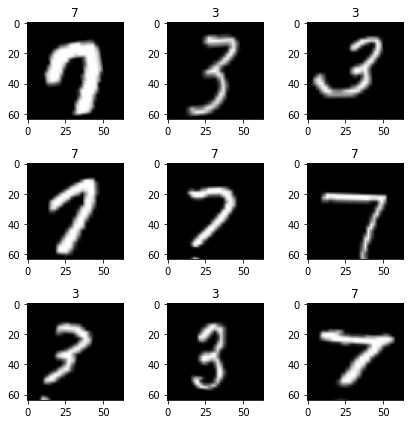

In [0]:
#CODE BELOW IS FULLY CREDITED TO FASTAI (fast.ai)
#USED ONLY FOR EDUCATIONAL PURPOSES UNDER FAIR USE

data.show_batch(3, figsize=(6,6), hide_axis=False)

https://docs.fast.ai/vision.html
https://docs.fast.ai/data_block.html